In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.interactive(True)

In [2]:
columns_list = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Src Bytes', 'Dst Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot', 'Num Failed Logins', 'Logged In', 'Num Compromised', 'Root Shell', 'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells', 'Num Access Files', 'Num Outbound Cmds', 'Is Hot Logins', 'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate', 'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate', 'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count', 'Dst Host Srv Count', 'Dst Host Same Srv Rate', 'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate', 'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate', 'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate', 'Dst Host Srv Rerror Rate', 'Label', 'Score']
nsl_kdd_train_data =  pd.read_csv('KDDTrain+.txt', sep=",", names=columns_list)

In [3]:
nsl_kdd_train_data.shape

(125973, 43)

In [4]:
# Test data
columns_list = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Src Bytes', 'Dst Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot', 'Num Failed Logins', 'Logged In', 'Num Compromised', 'Root Shell', 'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells', 'Num Access Files', 'Num Outbound Cmds', 'Is Hot Logins', 'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate', 'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate', 'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count', 'Dst Host Srv Count', 'Dst Host Same Srv Rate', 'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate', 'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate', 'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate', 'Dst Host Srv Rerror Rate', 'Label', 'Score']
nsl_kdd_test_data =  pd.read_csv('KDDTest+.txt', sep=",", names=columns_list)

In [5]:
nsl_kdd_test_data.shape

(22544, 43)

In [6]:
nsl_kdd_train_data['split'] ='train'
nsl_kdd_test_data['split']= 'test'

In [7]:
nsl_kdd_train_data.head()

,Duration,Protocol Type,Service,Flag,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Label,Score,split
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,train
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,train
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,train
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,train
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,train


In [8]:
# Concat Train and Test set
nsl_kdd_combined_data = pd.concat([nsl_kdd_train_data,nsl_kdd_test_data])

In [9]:
nsl_kdd_combined_data.shape

(148517, 44)

In [10]:
# group label column
nsl_kdd_combined_data_grouped = nsl_kdd_combined_data.copy()

In [11]:
nsl_kdd_combined_data_grouped.Label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [12]:
nsl_kdd_combined_data_grouped.replace(to_replace=['neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], value='anomaly', inplace=True)

In [13]:
nsl_kdd_combined_data_grouped.Label.unique()

array(['normal', 'anomaly'], dtype=object)

In [15]:
# Convert string columns to numerical columns
from sklearn.preprocessing import LabelEncoder

In [16]:
nsl_kdd_combined_data_enc = nsl_kdd_combined_data_grouped.copy()

In [17]:
cat_columns = ['Protocol Type', 'Service', 'Flag']
encoder = LabelEncoder()
for col in cat_columns:
    nsl_kdd_combined_data_enc[col] = encoder.fit_transform(nsl_kdd_combined_data_enc[col])

In [18]:
nsl_kdd_combined_data_enc.shape

(148517, 44)

In [19]:
nsl_kdd_combined_data_enc.head()

,Duration,Protocol Type,Service,Flag,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Label,Score,split
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,train
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,train
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,19,train
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,train
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,train


In [20]:
nsl_kdd_combined_data_enc['Label'].value_counts()

normal     77054
anomaly    71463
Name: Label, dtype: int64

In [24]:
train = nsl_kdd_combined_dataset[nsl_kdd_combined_dataset.split == "train"]
test = nsl_kdd_combined_dataset[nsl_kdd_combined_dataset.split == "test"]
train = train.drop("split", axis=1)
test = test.drop("split", axis=1)

In [25]:
# Feature Selection using chi 
from sklearn.feature_selection import chi2

In [26]:
X = train.drop('Label',axis=1)
y = train['Label']

In [27]:
chi_scores = chi2(X,y)

In [28]:
chi_scores

(array([7.08280969e+06, 1.72326704e+03, 8.24406380e+04, 5.46543695e+04,
        3.34032490e+09, 1.74609581e+09, 6.51239512e+00, 3.28272717e+03,
        1.81710838e+00, 4.87618999e+02, 2.97369498e+00, 3.62591460e+04,
        2.68943252e+04, 5.17680356e+01, 1.17303524e+02, 3.25504830e+04,
        1.05355586e+03, 1.34709608e+01, 4.09027580e+02,            nan,
        8.70617585e-01, 1.92525066e+02, 6.52574244e+06, 1.42326958e+01,
        3.73654160e+04, 3.74519039e+04, 6.92353165e+03, 6.99752801e+03,
        2.08265018e+04, 2.69428137e+03, 1.24533866e+03, 9.57432784e+05,
        6.96870490e+06, 2.34477802e+04, 3.19789138e+03, 6.92743399e+02,
        1.90567199e+02, 3.72260458e+04, 3.85444066e+04, 6.35482480e+03,
        6.86709925e+03, 4.88975234e+03]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.07125125e-002, 0.00000000e+000,
        1.77657860e-001, 4.69778661e-108, 8.46283548e-002, 0.00000000e+000,
        0.

In [29]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

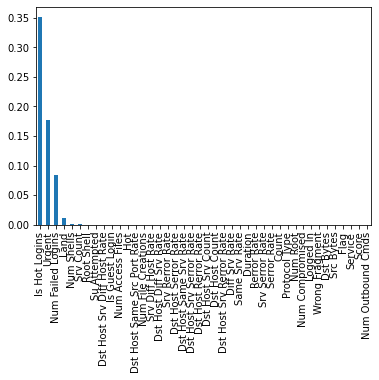

In [30]:
p_values.plot.bar()
plt.show()

In [47]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [48]:
X = train.drop('Label',axis=1)
y = train['Label']

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
fit.scores_

array([7.08280969e+06, 1.72326704e+03, 8.24406380e+04, 5.46543695e+04,
       3.34032490e+09, 1.74609581e+09, 6.51239512e+00, 3.28272717e+03,
       1.81710838e+00, 4.87618999e+02, 2.97369498e+00, 3.62591460e+04,
       2.68943252e+04, 5.17680356e+01, 1.17303524e+02, 3.25504830e+04,
       1.05355586e+03, 1.34709608e+01, 4.09027580e+02,            nan,
       8.70617585e-01, 1.92525066e+02, 6.52574244e+06, 1.42326958e+01,
       3.73654160e+04, 3.74519039e+04, 6.92353165e+03, 6.99752801e+03,
       2.08265018e+04, 2.69428137e+03, 1.24533866e+03, 9.57432784e+05,
       6.96870490e+06, 2.34477802e+04, 3.19789138e+03, 6.92743399e+02,
       1.90567199e+02, 3.72260458e+04, 3.85444066e+04, 6.35482480e+03,
       6.86709925e+03, 4.88975234e+03])

In [49]:
feature_score = pd.DataFrame(fit.scores_, index = X.columns)
feature_score

,0
Duration,7.082810e+06
Protocol Type,1.723267e+03
Service,8.244064e+04
Flag,5.465437e+04
Src Bytes,3.340325e+09
Dst Bytes,1.746096e+09
Land,6.512395e+00
Wrong Fragment,3.282727e+03
Urgent,1.817108e+00
Hot,4.876190e+02


In [50]:
feature_score.sort_values(by = [0], ascending = False)

,0
Src Bytes,3.340325e+09
Dst Bytes,1.746096e+09
Duration,7.082810e+06
Dst Host Srv Count,6.968705e+06
Count,6.525742e+06
Dst Host Count,9.574328e+05
Service,8.244064e+04
Flag,5.465437e+04
Dst Host Srv Serror Rate,3.854441e+04
Srv Serror Rate,3.745190e+04


<Figure size 1152x864 with 0 Axes>

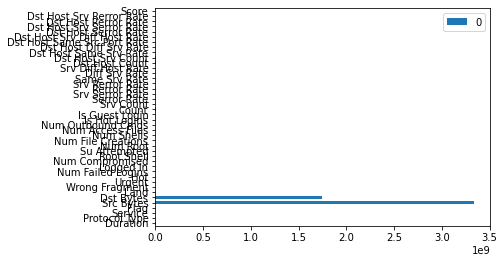

<Figure size 1152x864 with 0 Axes>

In [38]:
feature_score.plot(kind='barh')
plt.figure(figsize=(16,12))

In [53]:
# Information Gain
from sklearn.feature_selection import mutual_info_classif

In [54]:
X = train.drop('Label',axis=1)
y = train['Label']

"""
imp = mutual_info_classif(X,y)
feat_imp = pd.Series(imp, X.columns)
feat_imp.plot(kind='barh', color='teal')
"""

"\nimp = mutual_info_classif(X,y)\nfeat_imp = pd.Series(imp, X.columns)\nfeat_imp.plot(kind='barh', color='teal')\n"

In [55]:
imp = mutual_info_classif(X,y)
feat_imp = pd.DataFrame(imp, index = X.columns)
feat_imp

,0
Duration,0.024007
Protocol Type,0.054051
Service,0.468899
Flag,0.373233
Src Bytes,0.565804
Dst Bytes,0.440459
Land,0.000000
Wrong Fragment,0.007828
Urgent,0.001444
Hot,0.007006


In [56]:
feat_imp.sort_values(by = [0], ascending = False)

,0
Src Bytes,0.565804
Service,0.468899
Dst Bytes,0.440459
Flag,0.373233
Same Srv Rate,0.360973
Diff Srv Rate,0.359492
Dst Host Srv Count,0.332690
Dst Host Same Srv Rate,0.306479
Dst Host Diff Srv Rate,0.285250
Logged In,0.284762


In [ ]:
# RF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,f1_score, precision_score, recall_score

In [ ]:
train = nsl_kdd_combined_dataset[nsl_kdd_combined_dataset.split == "train"]
test = nsl_kdd_combined_dataset[nsl_kdd_combined_dataset.split == "test"]
train = train.drop("split", axis=1)
test = test.drop("split", axis=1)

In [ ]:

X_train= train.drop('Label', axis=1)
X_test=test.drop('Label', axis=1)
y_train=train['Label']
y_test= test['Label']

# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
expected = y_test

In [ ]:
arr = classifier.feature_importances_

In [ ]:
classifier.feature_importances_

In [ ]:
len(arr)

In [ ]:
feature_importances = pd.DataFrame(arr, index = X_train.columns)

In [ ]:
feature_importances.plot(kind='barh')
plt.figure(figsize=(16,12))

In [ ]:
feature_importances

In [ ]:
index_copy = list(nsl_kdd_combined_dataset.columns)

In [ ]:
index_copy.remove('Label')

In [ ]:
index_copy.remove('split')

In [ ]:
feature_importances = pd.DataFrame(arr, index =index_copy)

In [ ]:
feature_importances